In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/SupplementaryTable9_ColocNeuroSeq.csv"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/coloc_genes_w_sample_size.txt"
df = read.csv(filename)
# df = read.csv(filename, sep = "\t", header = F)
# colnames(df) = c("gwas_trait","gene_name","eqtl_map","top_GTEx_brain","top_GTEx_non_brain","category")
# df$X = c()
head(df)

study_id,locus_id,celltype_tissue,Ensemble_ID,n_variants,PP0,PP1,PP2,PP3,PP4,chromosome_grch37,GWAS_index_pos_grch37,eQTL_lead_pos_grch37
GCST003496,17,FPP_D11,ENSG00000051825,889,4.539090e-04,1.798307e-01,0.000359974,0.14193782,0.6774176,12,123688849,123404966
GCST003496,28,FPP_D11,ENSG00000103512,553,3.690000e-14,1.440000e-14,0.082547906,0.03138392,0.8860682,16,14579694,14975292
GCST003496,33,FPP_D11,ENSG00000134490,644,9.601054e-02,2.454605e-01,0.041522537,0.10564513,0.5113613,18,20885128,20876486
GCST003496,58,FPP_D11,ENSG00000105968,838,3.853253e-02,4.172537e-01,0.003175182,0.03387564,0.5071629,7,44848740,44822731
GCST003724,6,FPP_D11,ENSG00000003249,1990,3.407510e-04,5.746611e-03,0.007918431,0.13268726,0.8533069,16,89706992,90054018
GCST003770,4,FPP_D11,ENSG00000109920,747,1.350620e-04,6.973547e-02,0.000370071,0.19033619,0.7394232,11,47676170,47585348


In [3]:
# df = df[df$category == 'N',]

In [4]:
df$eqtl_map = as.character(df$celltype_tissue)
unique(df$eqtl_map)

[1] "FPP_D11"        "P_FPP_D11"      "FPP_D30"        "DA_D30"        
 [5] "Epen1_D30"      "Sert_D30"       "Astro_D52_ROT"  "Astro_D52_NONE"
 [9] "DA_D52_ROT"     "DA_D52_NONE"    "Epen1_D52_ROT"  "Epen1_D52_NONE"
[13] "Sert_D52_ROT"   "Sert_D52_NONE"

In [5]:
# df = df %>% mutate(eqtl_map = factor(eqtl_map, levels=c("pool1_13_noddd_D11.FPP","pool1_13_noddd_D11.P_FPP",
#                                                    "pool1_13_noddd_D11.NB",
#                                                    "pool1_13_noddd_D30.Astro","pool1_13_noddd_D30.DA",
#                                                    "pool1_13_noddd_D30.Sert","pool1_13_noddd_D30.Epen1",
#                                                    "NONE_DA","NONE_Sert","NONE_Epen1","NONE_Astro",
#                                                    "ROT_DA","ROT_Sert","ROT_Epen1","ROT_Astro")))

In [6]:
df$condition = 'D11'
df$condition[grep('D30',df$eqtl_map)] = 'D30'
df$condition[grep('NONE',df$eqtl_map)] = 'D52'
df$condition[grep('ROT',df$eqtl_map)] = 'D52_ROT'
unique(df$condition)

[1] "D11"     "D30"     "D52_ROT" "D52"

In [7]:
df$time_point = df$condition
df$time_point[df$condition == "D52_ROT"] = 'D52'
df$treatment = 'NONE'
df$treatment[df$condition == "D52_ROT"] = 'ROT'
tail(df)

,study_id,locus_id,celltype_tissue,Ensemble_ID,n_variants,PP0,PP1,PP2,PP3,PP4,chromosome_grch37,GWAS_index_pos_grch37,eQTL_lead_pos_grch37,eqtl_map,condition,time_point,treatment
2457,PD,15,Sert_D52_NONE,ENSG00000214941,609,4.300000e-25,4.480000e-22,2.008660e-04,0.20825133,0.7915478,17,16010920,15875147,Sert_D52_NONE,D52,D52,NONE
2458,PD,15,Sert_D52_NONE,ENSG00000011295,582,2.270000e-05,2.360348e-02,2.792960e-04,0.28997993,0.6861146,17,16010920,15910286,Sert_D52_NONE,D52,D52,NONE
2459,PD,22,Sert_D52_NONE,ENSG00000198171,968,4.216662e-02,3.292763e-01,8.945394e-03,0.06930368,0.5503080,20,3172246,3155375,Sert_D52_NONE,D52,D52,NONE
2460,PD,25,Sert_D52_NONE,ENSG00000163686,1358,2.214291e-03,1.524216e-01,2.204194e-03,0.15103451,0.6921254,3,58218352,58225974,Sert_D52_NONE,D52,D52,NONE
2461,PD,32,Sert_D52_NONE,ENSG00000188725,940,2.560000e-08,2.846833e-01,5.390000e-09,0.05917128,0.6561454,5,60345424,60493200,Sert_D52_NONE,D52,D52,NONE
2462,PD,34,Sert_D52_NONE,ENSG00000136243,695,4.720000e-07,1.717641e-03,2.060000e-05,0.07405854,0.9242027,7,23245569,23241866,Sert_D52_NONE,D52,D52,NONE


In [8]:
df$celltype = df$condition
df$celltype[grep('FPP',df$eqtl_map)] = 'FPP'
df$celltype[grep('P_FPP',df$eqtl_map)] = 'P_FPP'
df$celltype[grep('NB',df$eqtl_map)] = 'NB'
df$celltype[grep('DA',df$eqtl_map)] = 'DA'
df$celltype[grep('Sert',df$eqtl_map)] = 'Sert'
df$celltype[grep('Epen1',df$eqtl_map)] = 'Epen1'
df$celltype[grep('Astro',df$eqtl_map)] = 'Astro'
df$celltype[df$celltype == 'Astro' & df$condition == 'D30'] = 'FPP'
head(df)

study_id,locus_id,celltype_tissue,Ensemble_ID,n_variants,PP0,PP1,PP2,PP3,PP4,chromosome_grch37,GWAS_index_pos_grch37,eQTL_lead_pos_grch37,eqtl_map,condition,time_point,treatment,celltype
GCST003496,17,FPP_D11,ENSG00000051825,889,4.539090e-04,1.798307e-01,0.000359974,0.14193782,0.6774176,12,123688849,123404966,FPP_D11,D11,D11,NONE,FPP
GCST003496,28,FPP_D11,ENSG00000103512,553,3.690000e-14,1.440000e-14,0.082547906,0.03138392,0.8860682,16,14579694,14975292,FPP_D11,D11,D11,NONE,FPP
GCST003496,33,FPP_D11,ENSG00000134490,644,9.601054e-02,2.454605e-01,0.041522537,0.10564513,0.5113613,18,20885128,20876486,FPP_D11,D11,D11,NONE,FPP
GCST003496,58,FPP_D11,ENSG00000105968,838,3.853253e-02,4.172537e-01,0.003175182,0.03387564,0.5071629,7,44848740,44822731,FPP_D11,D11,D11,NONE,FPP
GCST003724,6,FPP_D11,ENSG00000003249,1990,3.407510e-04,5.746611e-03,0.007918431,0.13268726,0.8533069,16,89706992,90054018,FPP_D11,D11,D11,NONE,FPP
GCST003770,4,FPP_D11,ENSG00000109920,747,1.350620e-04,6.973547e-02,0.000370071,0.19033619,0.7394232,11,47676170,47585348,FPP_D11,D11,D11,NONE,FPP


In [9]:
# write.csv(df, filename, quote = F)

In [10]:
leads = df
leads$label = paste0(leads$celltype,"_",leads$condition)
unique(leads$label)

[1] "FPP_D11"       "P_FPP_D11"     "FPP_D30"       "DA_D30"       
 [5] "Epen1_D30"     "Sert_D30"      "Astro_D52_ROT" "Astro_D52"    
 [9] "DA_D52_ROT"    "DA_D52"        "Epen1_D52_ROT" "Epen1_D52"    
[13] "Sert_D52_ROT"  "Sert_D52"

In [11]:
leads$coloc_id = paste0(leads$Ensemble_ID,"-",leads$study_id)
head(leads$coloc_id)

[1] "ENSG00000051825-GCST003496" "ENSG00000103512-GCST003496"
[3] "ENSG00000134490-GCST003496" "ENSG00000105968-GCST003496"
[5] "ENSG00000003249-GCST003724" "ENSG00000109920-GCST003770"

In [12]:
# FPP & P_FPP
D11 = leads[leads$label == "FPP_D11",]
D30 = leads[leads$label == "FPP_D30",]
P_FPP = leads[leads$label == "P_FPP_D11",]

egenes0 = unique(D11$coloc_id)
egenes1 = unique(D30$coloc_id)
egenes2 = unique(P_FPP$coloc_id)
##
D11 = c(length(egenes0),length(unique(c(egenes0,egenes1))),length(egenes2))
D11

[1] 226 350 219

In [13]:
# DA
D30 = leads[leads$label == "DA_D30",]
D52 = leads[leads$label == "DA_D52",]
D52_r = leads[leads$label == "DA_D52_ROT",]
egenes30 = unique(D30$coloc_id)
egenes = unique(D52$coloc_id)
egenesROT = unique(D52_r$coloc_id)
##
DA = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))
DA

[1] 142 252 327

In [14]:
# Sert
D30 = leads[leads$label == "Sert_D30",]
D52 = leads[leads$label == "Sert_D52",]
D52_r = leads[leads$label == "Sert_D52_ROT",]
egenes30 = unique(D30$coloc_id)
egenes = unique(D52$coloc_id)
egenesROT = unique(D52_r$coloc_id)
##
Sert = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))
Sert

[1] 179 314 480

In [15]:
# Epen1
D30 = leads[leads$label == "Epen1_D30",]
D52 = leads[leads$label == "Epen1_D52",]
D52_r = leads[leads$label == "Epen1_D52_ROT",]
egenes30 = unique(D30$coloc_id)
egenes = unique(D52$coloc_id)
egenesROT = unique(D52_r$coloc_id)
##
Epen1 = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))
Epen1

[1] 171 308 423

In [16]:
# Astro
D52 = leads[leads$label == "Astro_D52",]
D52_r = leads[leads$label == "Astro_D52_ROT",]
egenes = unique(D52$coloc_id)
egenesROT = unique(D52_r$coloc_id)
##
Astro = c(length(egenes),length(unique(c(egenes,egenesROT))))
Astro

[1] 143 217

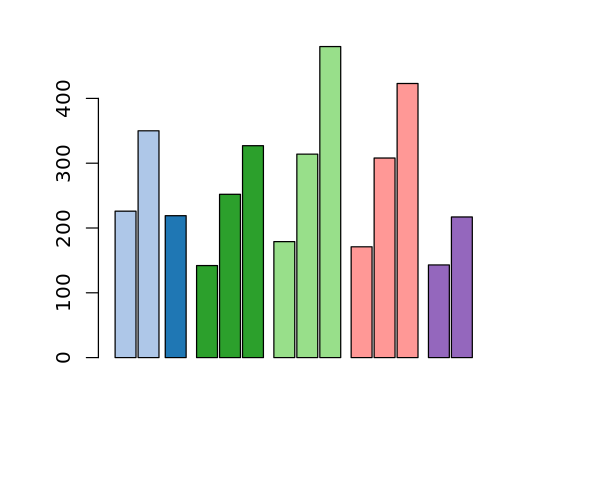

In [17]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

options(repr.plot.width = 5, repr.plot.height = 4)
my.xlim = c(0, 400)
my.ylim = c(0,20)
my.space = c(0,0.1,0.3,0.5, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5,0.1, 0.1,0.5,0.1)
opar <- par(lwd = 1)

barplot(c(D11,DA,Sert,Epen1,Astro),xlim = my.ylim, ylim = my.xlim, space = my.space,
       col = c(col_FPP,   col_FPP, col_P_FPP,
               col_DA,    col_DA,    col_DA, 
               col_Sert,  col_Sert,  col_Sert, 
               col_Epen1, col_Epen1, col_Epen1, 
               col_Astro, col_Astro))#,
#        border = c("lightgrey","darkgray","black", 
#                   "lightgrey","darkgray","black",  
#                   "lightgrey","darkgray","black", 
#                   "lightgrey","darkgray","black"))

In [19]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"

pdf(paste0(fig_dir,"Supp_Fig_6c.pdf"), width=5, height=4)
barplot(c(D11,DA,Sert,Epen1,Astro),xlim = my.ylim, ylim = my.xlim, space = my.space,
       col = c(col_FPP,   col_FPP, col_P_FPP,
               col_DA,    col_DA,    col_DA, 
               col_Sert,  col_Sert,  col_Sert, 
               col_Epen1, col_Epen1, col_Epen1, 
               col_Astro, col_Astro))
dev.off()